In [5]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow as tf
#from joblib import dump, load
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import h5py
from tools import load,save,checkdir
import theory
import os
import matplotlib.pyplot as plt

C:\tools\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [52]:
def load_model(model):
    
    model = tf.keras.models.load_model('mldata/%s.h5'%model) 
    return model

model = load_model("mymodel")
xsec = np.load("mldata/test_backward.npy")
xsec.shape

In [57]:
# par = model.predict( np.array( [xsec,] )  )
# par.shape

In [53]:
try: 
  import cPickle 
except:
  import _pickle as cPickle 
import sys, os
import zlib

def checkdir(path):
    if not os.path.exists(path): 
        os.makedirs(path)

def save(data,name):  
    cPickle.dumps(data)
    compressed=zlib.compress(cPickle.dumps(data))
    f=open(name,"wb")
    f.write(compressed)
    f.close()

def load(name): 
    compressed=open(name,"rb").read()
    data=cPickle.loads(zlib.decompress(compressed))
    return data

def load2(name): 
  compressed=open(name,"rb").read()
  data=cPickle.loads(compressed)
  return data

def isnumeric(value):
  try:
    int(value)
    return True
  except:
    return False

  return r'$\mathrm{'+x+'}$'

def ERR(msg):
  print(msg)
  sys.exit()

def lprint(msg):
  sys.stdout.write('\r')
  sys.stdout.write(msg)
  sys.stdout.flush()

In [54]:
#!/usr/bin/env python
import sys,os
import numpy as np
from scipy.special import gamma
from tools import save, load,checkdir,lprint

Q02=4.0
lam2=0.2**2
pu=np.ones(10)
pd=np.ones(10)
pu[5:]*=0.1
pd[5:]*=0.1

pmin=np.zeros(5)
pmax=np.zeros(5)
pmin[0],pmax[0]= 0,10 # N
pmin[1],pmax[1]=-1,1 # a
pmin[2],pmax[2]= 0,6 # a
pmin[3],pmax[3]=-1,1 # a
pmin[4],pmax[4]=-1,1 # a

def get_rand_par():
    pu=pmin + (pmax-pmin)*np.random.uniform(0,1,pmin.size)
    pd=pmin + (pmax-pmin)*np.random.uniform(0,1,pmin.size)
    par=np.append(pu,pd)
    return par

def set_params(par):
    pu[:5]=par[:5]
    pd[:5]=par[5:]

def beta(a, b):
    return gamma(a) * gamma(b) / gamma(a + b)

def get_s(Q2):
    return np.log(np.log(Q2/lam2)/np.log(Q02/lam2))

def _get_shape(x,p):
    return p[0]*x**p[1]*(1-x)**p[2]*(1+p[3]*x+p[4]*x**2)

def get_shape(x,p,s):
    N=p[0] + p[5] * s
    a=p[1] + p[6] * s
    b=p[2] + p[7] * s
    c=p[3] + p[8] * s
    d=p[4] + p[9] * s
    return _get_shape(x,[N,a,b,c,d])

def get_pdf(x,Q2,flav):
    s=get_s(Q2)
    if flav=='u': return get_shape(x,pu,s)
    if flav=='d': return get_shape(x,pd,s)

def get_obs(x,Q2,had):
    u=get_pdf(x,Q2,'u')
    d=get_pdf(x,Q2,'d')
    if had=='p': return 4*u+d
    if had=='n': return 4*d+u


if __name__=='__main__':

    x = np.linspace(0.01,0.99,100)
    Q2=4.0
    #print(get_obs(x,Q2,'p'))

    set_params(par)

    u = get_pdf(x,Q2,'u')
    d = get_pdf(x,Q2,'d')

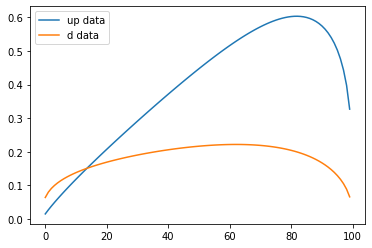

In [58]:
plt.plot(u)
plt.plot(d)
plt.legend(["up data", "d data"])
plt.show()